In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt

##### READ THE DATASET

In [3]:
data=pd.read_csv("webmd.csv")

In [4]:
data.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


#### Preprocessing

In [6]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [7]:
data.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [8]:
data.Reviews.unique()

array(["I'm a retired physician and of all the meds I have tried for my allergies (seasonal and not) - this one is the most effective for me.  When I first began using this drug some years ago - tiredness as a problem but is not currently.",
       'cleared me right up even with my throat hurting it went away after taking the medicine',
       'why did my PTINR go from a normal of 2.5 to over \n100?', ...,
       "As long as I was on chantix, I didn't smoke.  Terrible stomach upset after each dose, constipation, headaches constantly, crazy dreams and mood swings.  I have had to stop taking it and have found other ways to stop smoking.",
       "Started this medication Oct 5th 2008. Haven't smoked for 6 weeks and planning on the full 12 weeks program.  I have had some problems like getting sick after the meds but accually it helps because everytime I see a smoker or smell smoke I get sick, still want one but it offsets it.",
       "One year ago, I tried Chantix and had to stop taking i

In [9]:
data.dropna(inplace=True)

In [10]:
data.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

##### CHECKING DUPLICATES

In [11]:
data[data.duplicated()].shape

(943, 12)

In [12]:
data[data.duplicated()]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
12102,55-64,High Blood Pressure,5/22/2013,lisinopril solution,6873,5,5,,5,Male,"Dizziness , lightheadedness , tiredness, or ...",0
17120,55-64,High Blood Pressure,5/22/2013,lisinopril,6873,5,5,,5,Male,"Dizziness , lightheadedness , tiredness, or ...",0
21816,75 or over,Other,9/6/2015,lucentis vial,144667,1,1,My father was in end stage Macular degenration...,1,Male,Mild discomfort and increased tears may occur ...,0
22427,35-44,Abnormally Long or Heavy Periods,8/22/2019,larin fe,165169,4,4,Tired and nauseous the first week taking Larin...,4,Female,"Nausea , vomiting , headache , bloating , ...",0
24302,25-34,Fungal Infection of Fingernails - Onychomycosis,8/3/2019,lamisil tablet,12422,2,2,Had a rare-ish fungal infection starting at th...,1,,Diarrhea or stomach upset may occur.,0
...,...,...,...,...,...,...,...,...,...,...,...,...
339647,55-64,Diverticulitis,8/9/2019,cipro,1124,1,3,Helped ease Diverticulitis pain when combined...,1,Female,"Nausea , diarrhea , dizziness , lightheaded...",0
339648,55-64,Diverticulitis,8/9/2019,"cipro suspension, microcapsule reconstituted",1124,1,3,Helped ease Diverticulitis pain when combined...,1,Female,"Nausea , diarrhea , dizziness , lightheaded...",0
343090,25-34,Excessive Sweating,9/20/2019,clonidine hcl er,11754,5,5,Medication did exactly what I needed it to do....,5,Male,"Dizziness , lightheadedness , drowsiness, tir...",0
343390,25-34,Excessive Sweating,9/20/2019,clonidine hcl,11754,5,5,Medication did exactly what I needed it to do....,5,Male,"Dizziness , lightheadedness , drowsiness, dr...",0


In [13]:
data=data.drop_duplicates()

In [14]:
data[data.duplicated()].shape

(0, 12)

##### CHECKING OUTLIERS

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

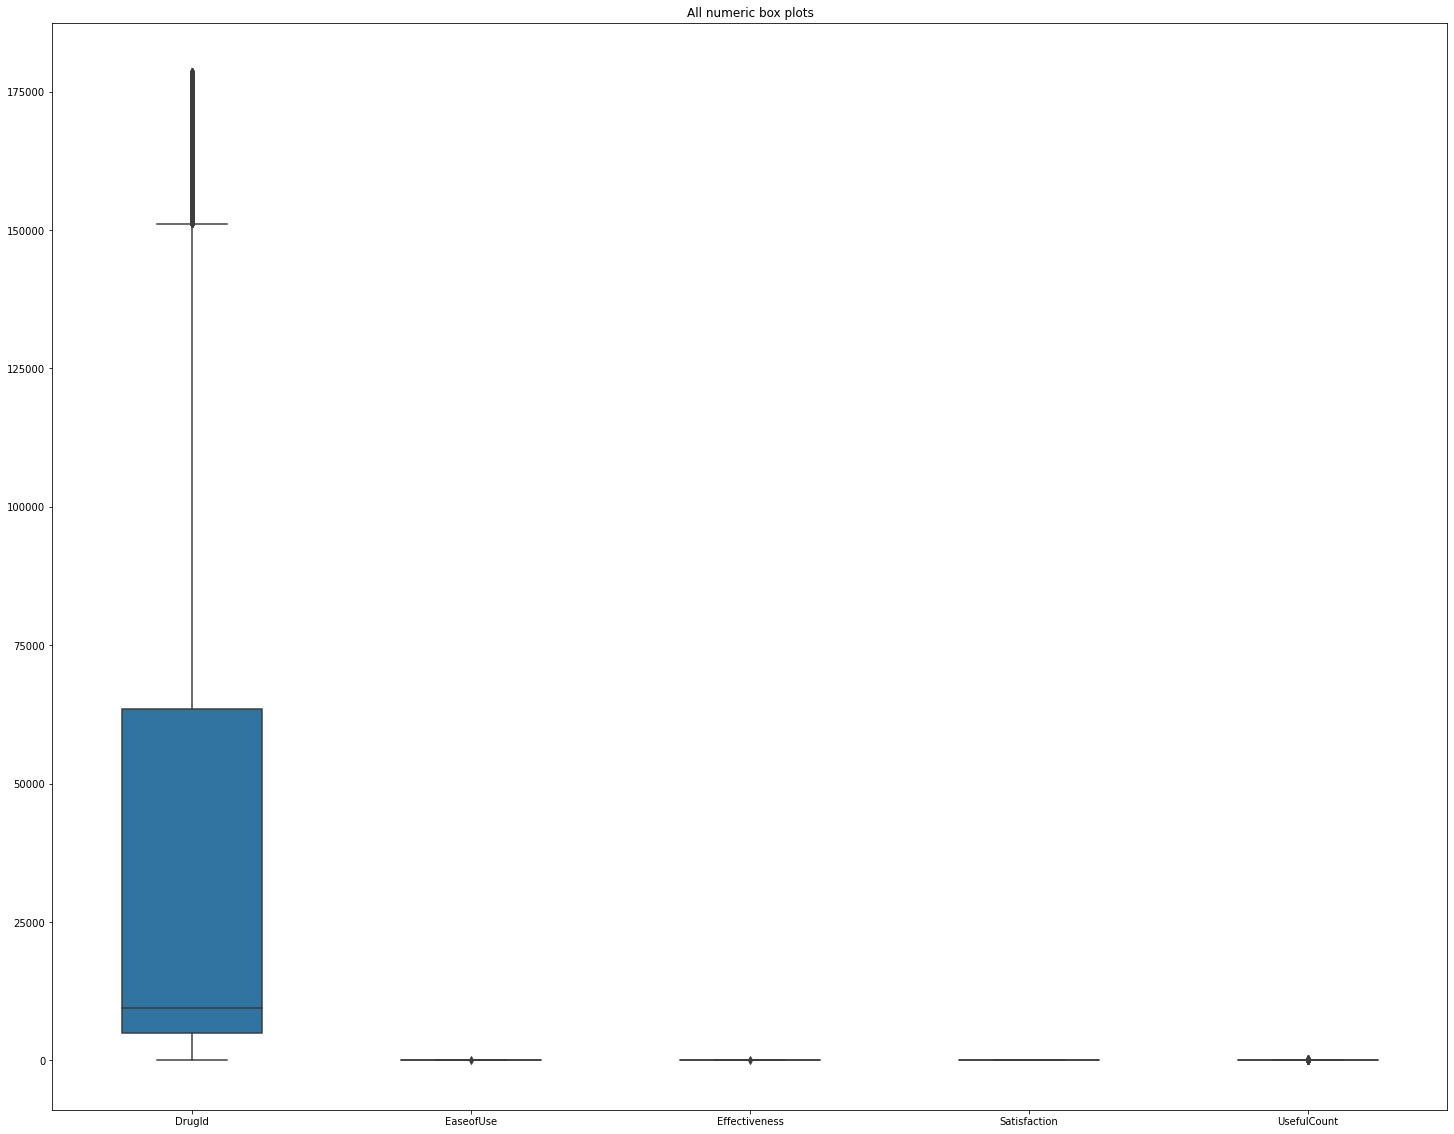

In [16]:
plt.figure(figsize=(25,20))
sns.boxplot(data=data.select_dtypes(include = ['int64']),width=0.5)
plt.title('All numeric box plots')
plt.show()

##### Exploratory Data Analysis

In [17]:
data['Sides'].describe()

count     361826
unique      1651
top             
freq       17058
Name: Sides, dtype: object

In [18]:
no_side=data.index[data['Sides'].apply(lambda x: x==' ')].tolist()

for i in no_side:
    data.loc[data.index==i,'Sides']='No side Effect .'  

In [19]:
data.loc[data.index, 'Sides'] = '[' + data['Sides'].astype(str)

In [20]:
data.loc[data.index, 'Sides'] = data['Sides'].astype(str) + ']'

In [21]:
def clean (li):
    li=li.replace('"','')
    li=li.replace(',',' ","')
    li=li.replace('[','["')
    li=li.replace(']',' "] ')
    li=li.replace('.',' ')
    
    return li

In [22]:
data['Sides']=data['Sides'].apply(clean)

In [23]:
data['Sides']=data['Sides'].apply(eval)

In [24]:
data['Sides']

0         [Drowsiness ,   dizziness  ,   dry mouth /nose...
1         [Drowsiness ,   dizziness  ,   dry mouth /nose...
2                                       [No side Effect   ]
3                                       [No side Effect   ]
4                                       [No side Effect   ]
                                ...                        
362801    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
362802    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
362803    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
362804    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
362805    [Nausea  ,   headache  ,   vomiting  ,  drowsi...
Name: Sides, Length: 361826, dtype: object

In [25]:
from collections import Counter

In [26]:
top_Sides =[ m[0] for m in Counter([i for j in data.Sides for i in j]).most_common(8)]

In [27]:
top_Sides

['  dizziness  ',
 'Nausea  ',
 '  vomiting  ',
 '  constipation  ',
 ' drowsiness ',
 '  headache  ',
 '  lightheadedness  ',
 '  dry mouth  ']

In [28]:
data["Sides_count"]=data['Sides'].apply(lambda x: len(x))

In [29]:
def categorise(row):  
    if row['Sides_count'] <= 4:
        return 0
    if row['Sides_count'] >4 and row['Sides_count'] <= 8:
        return 1
    if row['Sides_count'] > 8  and row['Sides_count'] <=12:
        return 2
    
    return 3

In [30]:
data['Sides_class'] = data.apply(lambda row: categorise(row), axis=1)

In [31]:
data[data['Sides_class']==2].head(2)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Sides_count,Sides_class
3326,19-24,Pinworm Infection,5/8/2015,pyrantel pamoate suspension,9999,5,5,I went to the doctors because I noticed I had ...,5,Female,"[Nausea , vomiting , diarrhea , stoma...",7,9,2
3327,25-34,Pinworm Infection,7/27/2014,pyrantel pamoate suspension,9999,3,5,I had a horrible pinworm infestation that was ...,5,Female,"[Nausea , vomiting , diarrhea , stoma...",13,9,2


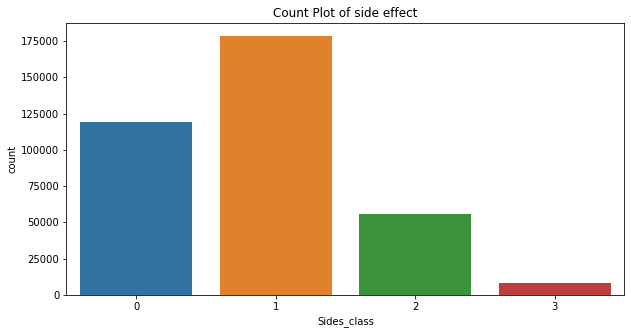

<Figure size 1080x360 with 0 Axes>

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sides_class',data=data)
plt.title("Count Plot of side effect" )
plt.figure(figsize=(15,5))
plt.tight_layout()
plt.show()

##### Age

In [33]:
data['Age'].value_counts().to_frame()

,Age
45-54,79857
55-64,74836
35-44,54948
25-34,49479
65-74,41121
19-24,24228
75 or over,15188
,12145
13-18,7045
7-12,1644


In [34]:
data['Age'].unique().tolist()

['75 or over',
 '25-34',
 '65-74',
 '35-44',
 '55-64',
 '45-54',
 '19-24',
 ' ',
 '13-18',
 '7-12',
 '0-2',
 '3-6']

In [35]:
data[data['Age']==' ']

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Sides_count,Sides_class
12,,Birth Control,7/3/2018,lyza,164750,2,1,This stuff needs to be removed from the market...,1,Female,"[Nausea , vomiting , headache , bloat...",0,6,1
73,,Abnormally Long or Heavy Periods,10/3/2012,lysteda,154120,5,5,54 YO with uterine fibroids and HEAVY clotting...,5,,"[Nausea , vomiting , diarrhea , and m...",10,4,0
91,,Abnormally Long or Heavy Periods,4/10/2012,lysteda,154120,3,4,I am 45 years old with fibroids. I have had he...,1,Female,"[Nausea , vomiting , diarrhea , and m...",18,4,0
184,,Neuropathic Pain,2/29/2020,lyrica,93965,5,5,No Script or health Insurance needed to place ...,5,,"[Drowsiness , dizziness , dry mouth , ...",12,6,1
185,,Nerve Pain after Herpes,2/24/2020,lyrica,93965,5,5,After using Lyrica for 3 weeks it really ly wo...,5,Male,"[Drowsiness , dizziness , dry mouth , ...",0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362517,,Stop Smoking,3/31/2010,chantix,144470,4,4,my husband and i are on chantix. saturday apri...,4,,"[Nausea , headache , vomiting , drowsi...",3,9,2
362571,,Stop Smoking,1/19/2010,chantix,144470,5,5,,3,,"[Nausea , headache , vomiting , drowsi...",0,9,2
362598,,Stop Smoking,12/9/2009,chantix,144470,5,5,,1,Male,"[Nausea , headache , vomiting , drowsi...",1,9,2
362645,,Stop Smoking,2/26/2009,chantix,144470,5,3,I have just started to take this medication. T...,3,,"[Nausea , headache , vomiting , drowsi...",9,9,2


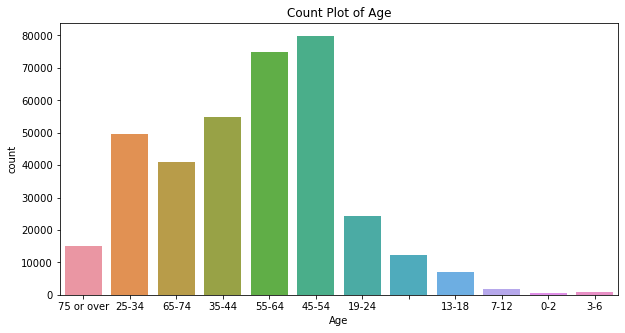

<Figure size 1080x360 with 0 Axes>

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age',data=data)
plt.title("Count Plot of Age" )
plt.figure(figsize=(15,5))
plt.tight_layout()
plt.show()

In [37]:
data[data['Condition']==' '].Condition.count()

43

In [38]:
condition_null=data.index[data['Condition'].apply(lambda x: x==' ')].tolist()

for i in condition_null:
    data.loc[data.index==i,'Condition']='Not mentioned'  

#### DRUG

In [39]:
data['Drug'].describe()

count       361826
unique        7093
top       cymbalta
freq          4646
Name: Drug, dtype: object

In [40]:
data[['DrugId','Drug']]

,DrugId,Drug
0,146724,25dph-7.5peh
1,146724,25dph-7.5peh
2,144731,warfarin (bulk) 100 % powder
3,144731,warfarin (bulk) 100 % powder
4,144731,warfarin (bulk) 100 % powder
...,...,...
362801,144470,chantix
362802,144470,chantix
362803,144470,chantix
362804,144470,chantix


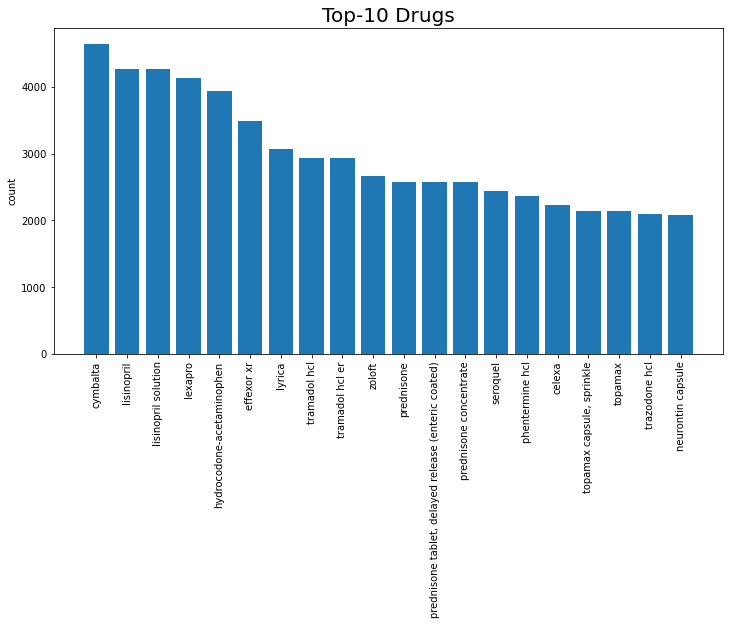

In [41]:
#plot a bargraph to check top 10 Drug
plt.figure(figsize=(12,6))
drugs =data['Drug'].value_counts(ascending = False).head(20)
plt.bar(drugs.index,drugs.values)
plt.title('Top-10 Drugs',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

##### SEX

In [42]:
data.Sex.value_counts()


Female    237735
Male       97657
           26434
Name: Sex, dtype: int64

In [43]:
no_sex=data.index[data['Sex'].apply(lambda x: x==' ')].tolist()

for i in no_sex:
    data.loc[data.index==i,'Sex']='Not mentioned'  

Text(0, 0.5, 'Count')

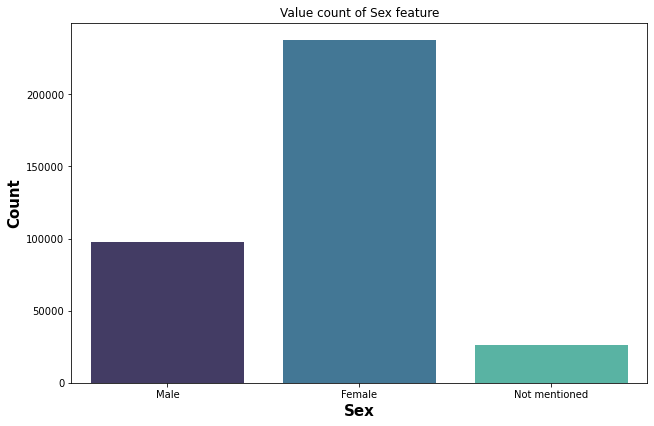

In [44]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = data, x = 'Sex', palette='mako')
plt.title('Value count of Sex feature')
ax.set_xlabel("Sex",fontsize=15, weight='semibold')
ax.set_ylabel("Count",fontsize=15, weight='semibold')

##### Reviews

In [45]:
data.Reviews.describe()

count     361826
unique    250167
top             
freq       41700
Name: Reviews, dtype: object

In [46]:
data['Reviews'][0]

"I'm a retired physician and of all the meds I have tried for my allergies (seasonal and not) - this one is the most effective for me.  When I first began using this drug some years ago - tiredness as a problem but is not currently."

In [47]:
data['review1'] = data['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['review1'].head()

0    i'm a retired physician and of all the meds i ...
1    cleared me right up even with my throat hurtin...
2    why did my ptinr go from a normal of 2.5 to ov...
3                         falling and don't realise it
4    my grandfather was prescribed this medication ...
Name: review1, dtype: object

In [48]:
data['eview1'] = data['review1'].str.replace('[^\w\s]', '')

Removing stop words

In [49]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ajish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
data['review1'] = data['review1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

Remove the Rare words

In [51]:
freq = pd.Series(' '.join(data['review1']).split()).value_counts()
less_freq = list(freq[freq == 1].index)
less_freq

['all..amazing!(especially',
 'wishy',
 "business...it's",
 'wic',
 'treatment,no',
 'but,hey,',
 'libio',
 'robaxin(3x/day)',
 'oblong?',
 '20cmg',
 'easy!.',
 'job.(jailer)',
 'latida',
 'washy',
 'me)..unit',
 'diabetics)',
 'arround.',
 'burns.i',
 '20mcg..fridge',
 'days..sure',
 'keratosis;',
 'baggie,',
 'ever.it',
 'onevertebra',
 'defecate!',
 'rest..and',
 'prayed.',
 'night.....you',
 'painful,humongous',
 '136lbs',
 'fussion(2',
 'soma(4x/day),',
 '(well...waste',
 'nuisances',
 'using.if',
 'ears.dizziness,no',
 'inaccurate,',
 'bam..i',
 'on-the-job',
 'working.now',
 'shot..not',
 'fine~~although',
 '120/64.',
 'warm-soothing',
 'side,effects,upset-tummy',
 'time.lantus',
 'reconmended',
 'stars!!!',
 'leasioins',
 'weight,all',
 'l-4,5',
 '(edex).',
 'percise',
 'head.ringing',
 '5-6$',
 'bowe.',
 'edex...my',
 'well...be',
 'swab,',
 'bit..drug',
 'zaps,in',
 'guys..we',
 'away--still',
 'vivid!',
 'get..its',
 'clornazapan',
 'weaps,',
 'all,45',
 'fullfilled,',
 'now

In [52]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [53]:
from textblob import TextBlob

In [54]:
def get_sentiment(text):
    blob=TextBlob(text)
    return sentiment.polarity
def get_sentiment_label(text):
    blob=TextBlob(text)
    if blob.polarity>0:
        result='positive'
    elif blob.polarity<0:
        result='negative'
    else:
        result='neutral'
    return result

In [55]:
data['Sentiment_label']=data['review1'].apply(get_sentiment_label)

<AxesSubplot:>

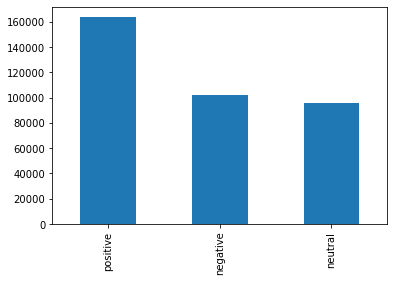

In [56]:
data['Sentiment_label'].value_counts().plot(kind='bar')

In [57]:
data[['Satisfaction','Sentiment_label','UsefulCount']].head(20)

,Satisfaction,Sentiment_label,UsefulCount
0,5,positive,0
1,5,positive,1
2,3,positive,0
3,1,neutral,0
4,1,positive,1
5,4,neutral,0
6,2,negative,0
7,5,neutral,0
8,2,neutral,1
9,2,neutral,0


ENCODING

In [58]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Sides_count', 'Sides_class', 'review1', 'eview1',
       'Sentiment_label'],
      dtype='object')

In [59]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder={}
cat_data=['Age','Sex','Sentiment_label']
for i in cat_data:
    label_encoder[i] = LabelEncoder()
    data[i] = label_encoder[i].fit_transform(data[i]) 

In [60]:
data.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Sides_count,Sides_class,review1,eview1,Sentiment_label
0,11,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,1,"[Drowsiness , dizziness , dry mouth /nose...",0,7,1,i'm retired physician meds tried allergies (se...,im a retired physician and of all the meds i h...,2
1,4,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,0,"[Drowsiness , dizziness , dry mouth /nose...",1,7,1,cleared right even throat hurting went away ta...,cleared me right up even with my throat hurtin...,2
2,9,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,0,[No side Effect ],0,1,0,ptinr go normal 2.5 100?,why did my ptinr go from a normal of 25 to ove...,2
3,11,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,0,[No side Effect ],0,1,0,falling realise,falling and dont realise it,1
4,6,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,1,[No side Effect ],1,1,0,grandfather prescribed medication (coumadin) a...,my grandfather was prescribed this medication ...,2


In [61]:
data.Condition.value_counts()

Other                                                         49332
Pain                                                          25199
High Blood Pressure                                           23268
Depression                                                    14505
Birth Control                                                 12251
                                                              ...  
Skin & Lymph Node Infection by Sporothrix Schenckii Fungus        1
Bacterial Blood Infection caused by Pseudomonas Aeruginosa        1
Surgery on the Thyroid Gland                                      1
Infection From Birth due to Toxoplasma Gondii Parasite            1
Disease caused by the Worm Onchocerca Volvulus                    1
Name: Condition, Length: 1805, dtype: int64

In [62]:
data.Condition.value_counts().to_dict()

{'Other': 49332,
 'Pain': 25199,
 'High Blood Pressure': 23268,
 'Depression': 14505,
 'Birth Control': 12251,
 'Neuropathic Pain': 8988,
 'Type 2 Diabetes Mellitus': 7646,
 'Chronic Trouble Sleeping': 7405,
 'Attention Deficit Disorder with Hyperactivity': 6800,
 'Bipolar Depression': 5946,
 'Migraine Prevention': 4988,
 'Panic Disorder': 4867,
 'Major Depressive Disorder': 4254,
 'Repeated Episodes of Anxiety': 4138,
 'Rheumatoid Arthritis': 3963,
 'Overweight': 3888,
 'High Cholesterol': 3592,
 'Disorder characterized by Stiff, Tender & Painful Muscles': 3471,
 'Underactive Thyroid': 3153,
 'Migraine Headache': 3045,
 'Anxious': 3015,
 'Chronic Pain': 2911,
 'Asthma': 2585,
 '"Change of Life" Signs': 2568,
 'Cough': 2563,
 'Acne': 2517,
 'Joint Damage causing Pain and Loss of Function': 2451,
 'Pain Originating From a Nerve': 2398,
 'Muscle Spasm': 2008,
 'Condition in which Stomach Acid is Pushed Into the Esophagus': 1915,
 'Stop Smoking': 1749,
 'Combined High Blood Cholesterol an